In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dateutil

In [33]:
fr_raw = pd.read_csv(r'..\data\search\peak_finder\Final_Results.csv').dropna(axis=1, how='all')
fr_norm = pd.read_csv(r'..\data\processed\lipidomics_linregress_normalized_data.csv')
fr_filt = pd.read_csv(r'..\data\processed\lipidomics_normalized_filtered_data.csv', index_col=0)
file_grouping = pd.read_csv(r'..\data\metadata\file_grouping.csv', index_col=0)

fr_quant_filenames_in_analytical_order = file_grouping[file_grouping['quant_file'] == True]['fr_name'].to_list()

animals_used = [1091, 1093, 1060, 1062, 1074, 1092, 1102, 1076, 1082, 1101]
diabetic = [1076, 1082, 1101]
impaired = [1060, 1062, 1074, 1092, 1102]
normal = [1091, 1093]
bg_dict = {'diabetic': diabetic, 'impaired': impaired, 'normal': normal}
animal_to_tolerance_dict = {1076: 'diabetic', 1082: 'diabetic',1101: 'diabetic',
                            1060: 'impaired', 1062: 'impaired', 1074: 'impaired', 1092: 'impaired', 1102: 'impaired', 
                            1091: 'normal', 1093: 'normal',}

obs = pd.read_excel(r'..\data\metadata\20210421_FBGRBGOGTT_Huishi sample sheet.xlsx', sheet_name='cleaned')
obs['animal'] = obs['animal'].str.strip('TM').astype('int')
obs['datetime'] = obs['when'].apply(dateutil.parser.parse)
animal_phenotypes = pd.read_excel(r'..\data\metadata\20210421_FBGRBGOGTT_Huishi sample sheet.xlsx', sheet_name='animal phenotypes')
animal_phenotypes['animal'] = animal_phenotypes['animal'].str.strip('TM').astype('int')

metab_file_grouping = pd.read_csv(r'..\data\metadata\metabolomics_file_grouping.csv')
tf = pd.read_excel(r'..\data\raw\metabolomics\20210904_KAO_Huishi_HILIC_Tracefinder_peakAreas.xlsx', index_col=0)
tf_metab_cols = tf.columns
tf = tf.merge(metab_file_grouping[['bg_type', 'animal', 'week', 'qc_file', 'blank_file', 'quant_file', 'glucose_tolerance']],
        left_on=tf.index, right_on=metab_file_grouping['File Name'])
tf

,key_0,Acetyl-L-carnitine,Adenosine 5'-monophosphate,Cytidine 5'-diphosphocholine,DL-Carnitine,DL-Glutamine,DL-Leucine/Isoleucine,DL-Lysine,DL-Proline,Glycine,...,Threonine,Tryptophan,α-Lactose,bg_type,animal,week,qc_file,blank_file,quant_file,glucose_tolerance
0,20210831_KAO_HILIC_ACN_20210831232610,2.257726e+04,2.194400e+05,0.000000,0.000000e+00,0.000000e+00,2.089273e+04,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000,NaN,NaN,NaN,False,True,False,NaN
1,20210831_KAO_HILIC_extraction_blank_1,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,1.234542e+04,1.767827e+04,0.000000e+00,0.000000e+00,0.000000e+00,...,3.913862e+05,0.000000e+00,20411.529395,NaN,NaN,NaN,False,True,False,NaN
2,20210831_KAO_HILIC_extraction_blank_1_20210901...,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,1.977614e+04,2.068825e+04,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,22247.587290,NaN,NaN,NaN,False,True,False,NaN
3,20210831_KAO_HILIC_human_plasma_1,1.349962e+07,1.963570e+04,11313.341075,4.297005e+07,1.978960e+08,2.702475e+07,8.739398e+06,2.072207e+07,1.284400e+06,...,2.670877e+07,3.625402e+06,334542.852557,NaN,NaN,NaN,True,False,False,NaN
4,20210831_KAO_HILIC_human_plasma_2,1.404424e+07,3.692582e+04,21254.388456,4.334441e+07,1.354963e+08,4.882924e+07,9.202445e+06,2.576817e+07,8.038567e+05,...,2.524489e+07,4.133652e+06,150192.203589,NaN,NaN,NaN,True,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,20210831_KAO_HILIC_T1102M_20210327_8wk_FBG,9.900185e+07,1.585914e+06,83522.481546,3.184427e+07,1.414438e+08,3.402026e+07,1.162575e+07,1.087277e+07,1.970609e+06,...,1.655164e+07,4.369452e+06,132854.565044,FBG,1102.0,8.0,False,False,True,impaired
64,20210831_KAO_HILIC_T1102M_20210402_9wk_FBG,1.139366e+08,9.586290e+05,67111.535109,2.552895e+07,1.203286e+08,2.503039e+07,1.166529e+07,8.706379e+06,1.730554e+06,...,1.611318e+07,4.847306e+06,39725.816577,FBG,1102.0,9.0,False,False,True,impaired
65,20210831_KAO_HILIC_T1102M_20210406_9wk_RBG,4.859275e+07,1.138970e+06,100112.114384,4.506856e+07,1.271040e+08,1.079708e+08,1.483510e+07,1.971799e+07,2.297562e+06,...,3.302676e+07,6.498828e+06,148418.615887,RBG,1102.0,9.0,False,False,True,impaired
66,20210831_KAO_HILIC_T1102M_20210410_10wk_FBG,1.008235e+08,9.379053e+05,34793.936649,3.472707e+07,1.329792e+08,3.225403e+07,1.152360e+07,1.287038e+07,2.448366e+06,...,1.574682e+07,5.787762e+06,105873.609933,FBG,1102.0,10.0,False,False,True,impaired


In [23]:
metab_file_grouping

,File Name,analytical_order,fixed_filename,qc_file,quant_file,blank_file,animal,week,bg_type
0,20210831_KAO_HILIC_ACN_20210831232610,1,20210831_KAO_HILIC_ACN_20210831232610,False,False,True,NaN,NaN,NaN
1,20210831_KAO_HILIC_extraction_blank_1,2,20210831_KAO_HILIC_extraction_blank_1,False,False,True,NaN,NaN,NaN
2,20210831_KAO_HILIC_extraction_blank_1_20210901...,3,20210831_KAO_HILIC_extraction_blank_1_20210901...,False,False,True,NaN,NaN,NaN
3,20210831_KAO_HILIC_human_plasma_1,4,20210831_KAO_HILIC_human_plasma_1,True,False,False,NaN,NaN,NaN
4,20210831_KAO_HILIC_T1060M_20210401_9wk_RBG,5,20210831_KAO_HILIC_T1060M_20210401_9wk_RBG,False,True,False,1060.0,9.0,RBG
...,...,...,...,...,...,...,...,...,...
63,20210831_KAO_HILIC_T1060M_20210408_10wk_RBG,64,20210831_KAO_HILIC_T1060M_20210408_10wk_RBG,False,True,False,1060.0,10.0,RBG
64,20210831_KAO_HILIC_T1102M_20210327_8wk_FBG,65,20210831_KAO_HILIC_T1102M_20210327_8wk_FBG,False,True,False,1102.0,8.0,FBG
65,20210831_KAO_HILIC_T1074M_20210322_8wk_FBG,66,20210831_KAO_HILIC_T1074M_20210322_8wk_FBG,False,True,False,1074.0,8.0,FBG
66,20210831_KAO_HILIC_T1082M_20210401_9wk_RBG,67,20210831_KAO_HILIC_T1082M_20210401_9wk_RBG,False,True,False,1082.0,9.0,RBG


key_0,20210831_KAO_HILIC_ACN_20210831232610,20210831_KAO_HILIC_extraction_blank_1,20210831_KAO_HILIC_extraction_blank_1_20210901004002,20210831_KAO_HILIC_human_plasma_1,20210831_KAO_HILIC_human_plasma_2,20210831_KAO_HILIC_human_plasma_3,20210831_KAO_HILIC_human_plasma_4,20210831_KAO_HILIC_human_plasma_5,20210831_KAO_HILIC_T112M_20210330_8wk_RBG,20210831_KAO_HILIC_T193M20210406_9wk_RBG,...,20210831_KAO_HILIC_T1101M_20210330_8wk_RBG,20210831_KAO_HILIC_T1101M_20210402_9wk_FBG,20210831_KAO_HILIC_T1101M_20210406_9wk_RBG,20210831_KAO_HILIC_T1101M_20210410_10wk_FBG,20210831_KAO_HILIC_T1101M_20210413_10wk_RBG,20210831_KAO_HILIC_T1102M_20210327_8wk_FBG,20210831_KAO_HILIC_T1102M_20210402_9wk_FBG,20210831_KAO_HILIC_T1102M_20210406_9wk_RBG,20210831_KAO_HILIC_T1102M_20210410_10wk_FBG,20210831_KAO_HILIC_T1102M_20210413_10wk_RBG
Acetyl-L-carnitine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.205701,0.209923,...,0.211857,0.222084,0.20633,0.219509,0.20513,0.220238,0.222896,0.206213,0.220585,0.202202
Adenosine 5'-monophosphate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.101806,0.105433,...,0.102427,0.0943888,0.0841816,0.108933,0.0942176,0.121658,0.106011,0.111487,0.105308,0.0929746
Cytidine 5'-diphosphocholine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0140152,0.0244709,...,0.0209974,0.0180998,0.0101687,4.12251e-06,-0.019757,0.0115891,0.00115748,0.0199309,-0.0327965,0.0124114
DL-Carnitine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.203866,0.208312,...,0.196805,0.193365,0.20149,0.197332,0.194508,0.197405,0.192645,0.204671,0.199242,0.19748
DL-Glutamine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.222865,0.225354,...,0.224061,0.222249,0.223085,0.224794,0.220019,0.226918,0.223919,0.22494,0.225779,0.221074
DL-Leucine/Isoleucine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.222932,0.209097,...,0.218215,0.203313,0.220502,0.204271,0.214551,0.198808,0.192215,0.221883,0.197677,0.216329
DL-Lysine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.182452,0.182511,...,0.178532,0.175319,0.182332,0.180626,0.183568,0.174777,0.174858,0.180477,0.174568,0.178082
DL-Proline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.187829,0.184744,...,0.181377,0.168525,0.186735,0.17311,0.180723,0.173185,0.167814,0.186943,0.177174,0.180459
Glycine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.126998,0.131435,...,0.126455,0.132626,0.126234,0.13566,0.124035,0.128096,0.124267,0.13254,0.134356,0.124884
Guanosine: all right MS2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.082451,0.0859923,...,0.100285,0.0842954,0.0986604,0.0868076,0.0985317,0.088574,0.0766625,0.10827,0.0843325,0.0983765


13     20210831_KAO_HILIC_T1093M_20210330_8wk_RBG
26     20210831_KAO_HILIC_T1091M_20210406_9wk_RBG
32    20210831_KAO_HILIC_T1091M_20210413_10wk_RBG
34       20210831_KAO_HILIC_T193M20210406_9wk_RBG
39     20210831_KAO_HILIC_T1091M_20210330_8wk_RBG
44    20210831_KAO_HILIC_T1093M_20210413_10wk_RBG
Name: File Name, dtype: object
4      20210831_KAO_HILIC_T1060M_20210401_9wk_RBG
6     20210831_KAO_HILIC_T1092M_20210413_10wk_RBG
14     20210831_KAO_HILIC_T1074M_20210401_9wk_RBG
17     20210831_KAO_HILIC_T1092M_20210406_9wk_RBG
23    20210831_KAO_HILIC_T1102M_20210413_10wk_RBG
24     20210831_KAO_HILIC_T1074M_20210325_8wk_RBG
33     20210831_KAO_HILIC_T1062M_20210325_8wk_RBG
38      20210831_KAO_HILIC_T112M_20210330_8wk_RBG
41     20210831_KAO_HILIC_T1062M_20210401_9wk_RBG
48    20210831_KAO_HILIC_T1074M_20210408_10wk_RBG
50    20210831_KAO_HILIC_T1062M_20210408_10wk_RBG
58     20210831_KAO_HILIC_T1060M_20210325_8wk_RBG
59     20210831_KAO_HILIC_T1102M_20210406_9wk_RBG
61     20210831_KAO

C:\Users\ben\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
C:\Users\ben\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\ben\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\ben\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\ben\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],
C:\Users\ben\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
C:\Users\ben\Anaconda3\lib\site-packages\matplotlib\cb

AttributeError: 'Figure' object has no attribute 'supxlabel'

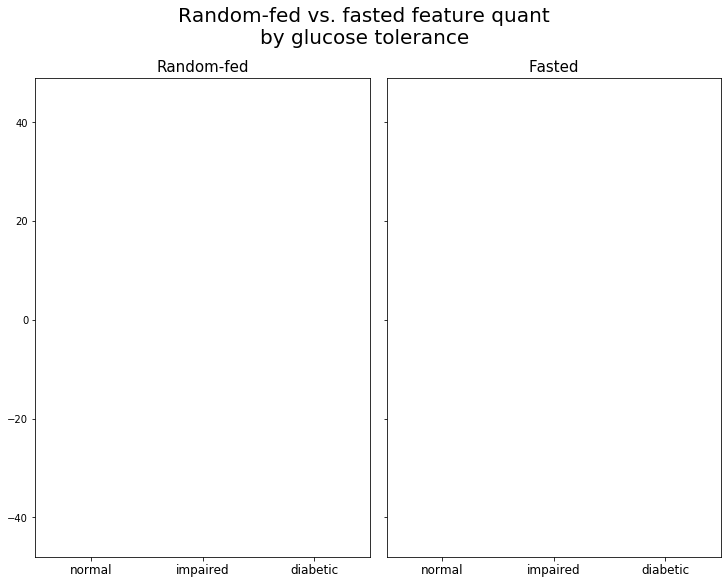

In [38]:
df = tf
df[tf_metab_cols] = np.log2(df[df['quant_file'] == True][tf_metab_cols])
df = df.set_index('key_0').T
display(df)

fig, axs = plt.subplots(nrows=1, ncols=2, sharey=True, constrained_layout=True)
fig.set_size_inches((10, 8))

for ax, bg_type in zip(axs, ['RBG', 'FBG']):
    for tol_type, position in zip(['normal', 'impaired', 'diabetic'], [1,2,3]):
        # Get filenames that match bg_type and tol_type
        cols = metab_file_grouping[(metab_file_grouping['bg_type'] == bg_type) & \
                             (metab_file_grouping['glucose_tolerance'] == tol_type) & \
                             (metab_file_grouping['quant_file'] == True)]['File Name']
        print(cols)
        ax.boxplot(df[cols].mean(axis=1), positions=[position, ], widths=0.9)
        
        # Option for barplots, much slower to render though
#         ax.bar(position, df[cols].mean(axis=1))
        
    ax.set_title('Random-fed' if bg_type == 'RBG' else 'Fasted', fontsize=15)
    ax.set_xticks([1,2,3], )
    ax.set_xticklabels(['normal', 'impaired', 'diabetic'], fontsize=12)

fig.suptitle('Random-fed vs. fasted feature quant\nby glucose tolerance', fontsize=20)
fig.supxlabel('glucose tolerance', fontsize=15)
fig.supylabel('log2 feature quant', fontsize=15)